# ##############################################################
#                 Modélisation : TEST 2
# ##############################################################

In [1]:
import numpy as np
import pandas as pd

# pour afficher toutes les colonnes:
pd.options.display.max_columns = None

import matplotlib.pyplot as plt# Pie chart
import matplotlib.cm as cm

#nlp
from sklearn.feature_extraction.text import CountVectorizer

# modélisation
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# évaluation modèle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#df_model = pd.read_csv("../dataset/data_modelisation.csv", sep=',')
#df_model = df_model.drop(['Unnamed: 0'], axis=1)
#df_model.head()

df = pd.read_csv("../dataset/data_gp.csv", sep=',', index_col='date')
#df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)
#df_model.head()

,Avril,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre,reel,effectif,porc,viande,bio,poisson,noel,plat_prepare,laitage,an_chinois
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,0.0,0.0,0.0,16047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10290,16047.0,0.0,16047.0,0,0.0,0.0,16047.0,0,0
2011-01-04,0.0,0.0,0.0,17373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11808,17373.0,0.0,17373.0,0,0.0,0.0,17373.0,87,0
2011-01-06,0.0,0.0,0.0,17373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11741,17373.0,17373.0,17373.0,87,0.0,0.0,0.0,0,0
2011-01-07,0.0,0.0,0.0,17373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12322,17373.0,0.0,0.0,0,17373.0,0.0,0.0,87,0
2011-01-10,0.0,0.0,0.0,17373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11302,17373.0,0.0,0.0,0,17373.0,0.0,17373.0,87,0


In [3]:
print(df.shape)
df.info()

(1061, 21)
<class 'pandas.core.frame.DataFrame'>
Index: 1061 entries, 2011-01-03 to 2019-12-19
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Avril         1061 non-null   float64
 1   Decembre      1061 non-null   float64
 2   Fevrier       1061 non-null   float64
 3   Janvier       1061 non-null   float64
 4   Juillet       1061 non-null   float64
 5   Juin          1061 non-null   float64
 6   Mai           1061 non-null   float64
 7   Mars          1061 non-null   float64
 8   Novembre      1061 non-null   float64
 9   Octobre       1061 non-null   float64
 10  Septembre     1061 non-null   float64
 11  reel          1061 non-null   int64  
 12  effectif      1061 non-null   float64
 13  porc          1061 non-null   float64
 14  viande        1061 non-null   float64
 15  bio           1061 non-null   int64  
 16  poisson       1061 non-null   float64
 17  noel          1061 non-null   float64
 18  plat_pr

### Préparation à la modélisation

In [4]:
#df['date'] = pd.to_datetime(df['date'])
#df.set_index('date', inplace=True)

# suppression des variables citées dans le nb modélisation : test 1
train_data = df['2015-09':'2018-07']
X_train = train_data.drop(['reel', 'effectif', 'porc', 'bio', 'plat_prepare', 'laitage', 'an_chinois'], axis=1)
y_train = train_data[['reel']]

test_data = df['2018-09':'2019-07']
X_test = test_data.drop(['reel', 'effectif', 'porc', 'bio', 'plat_prepare', 'laitage', 'an_chinois'], axis=1)
y_test = test_data[['reel']]

#data = df_model.drop(['effectif'], axis=1)
#X = data['2015-09':'2020-07']
#y = X[['reel']]
print("X_train : ", X_train.shape,",", "X_test :", X_test.shape)

X_train :  (379, 14) , X_test : (127, 14)


### Modélisation : deuxième modèle avec un ajustement des variables

In [5]:
#On commence à entrainer le modèle à partir de l'année scolaire 2015-2016
#On test sur l'année 2018-2019

# construction du modèle de régression linéaire multiple de moindre carré ordinaire
mod = sm.OLS(y_train, X_train)

# lancement de l'entraînement
res = mod.fit()


print(res.summary())

#dfm = df_model

# prédiction du modèle
y_pred = res.predict(X_test)
y_true = y_test

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.013e+04
Date:                Mon, 28 Apr 2025   Prob (F-statistic):                        0.00
Time:                        19:29:00   Log-Likelihood:                         -2892.9
No. Observations:                 379   AIC:                                      5814.
Df Residuals:                     365   BIC:                                      5869.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Analyse des résultats

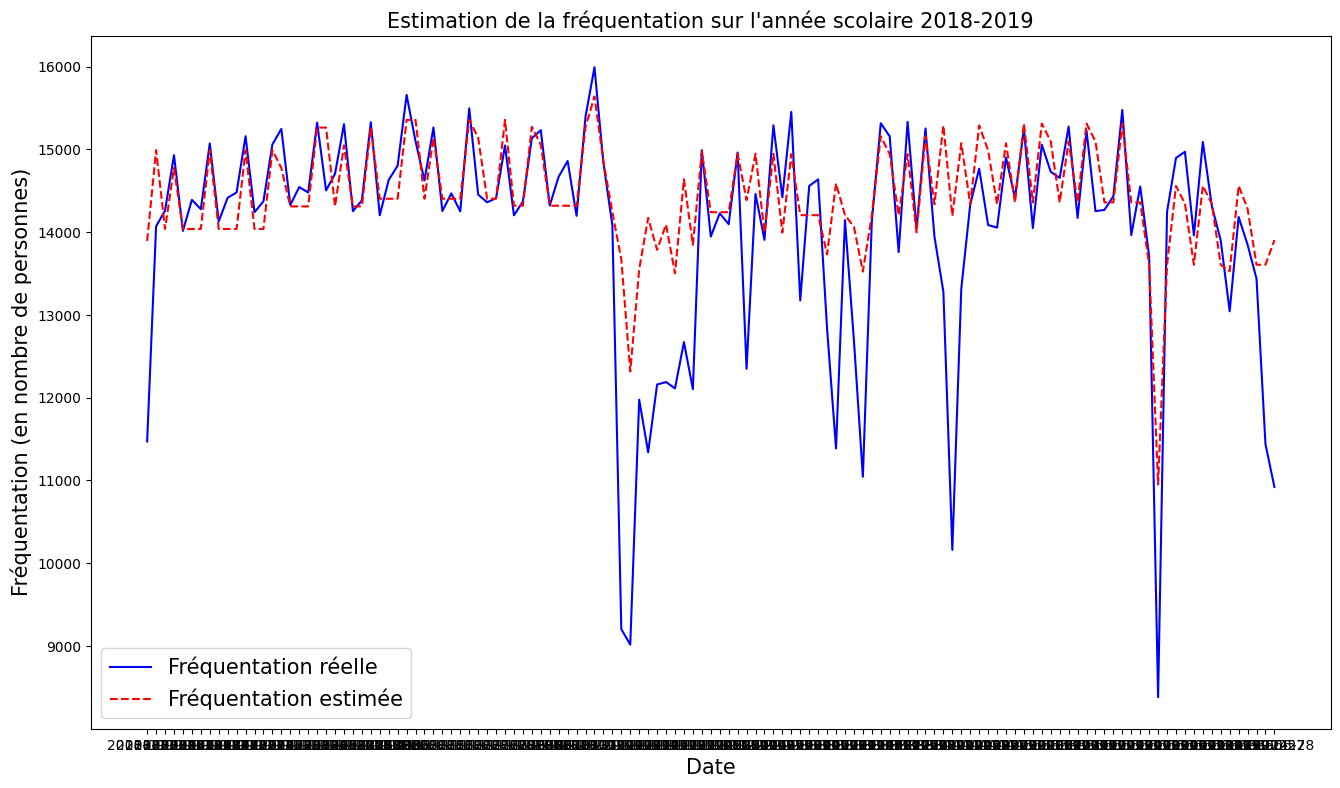

In [6]:
# Visualisation
plt.figure(figsize=(16,9))
plt.plot(y_true.index, y_true, label="Fréquentation réelle", color='blue')
plt.plot(y_pred.index, y_pred, label="Fréquentation estimée", color='red', linestyle='--')

plt.title("Estimation de la fréquentation sur l'année scolaire 2018-2019", fontsize=15)
plt.ylabel("Fréquentation (en nombre de personnes)", fontsize=15)
plt.xlabel("Date", fontsize=15)

plt.legend(fontsize=15)

### Analyse des résultats pour chaque variable

In [7]:
# Coefficients
print("Coefficients:")
print(res.params)

# P-values
print("\nP-values:")
print(res.pvalues)

# Résidus
print("\nRésidus:")
print(res.resid)

# R2
print("\nR²:")
print(res.rsquared)

results_df = pd.DataFrame({
    'coef': res.params,
    'std_err': res.bse,
    't': res.tvalues,
    'P>|t|': res.pvalues
}).round(5)

results_df

Coefficients:
Avril        0.740955
Decembre     0.740102
Fevrier      0.724130
Janvier      0.736227
Juillet      0.606644
Juin         0.705050
Mai          0.742045
Mars         0.734497
Novembre     0.744254
Octobre      0.739697
Septembre    0.726281
viande      -0.036231
poisson      0.010612
noel         0.064914
dtype: float64

P-values:
Avril        6.565337e-286
Decembre     1.515688e-297
Fevrier      9.206587e-289
Janvier      2.296780e-305
Juillet      4.102222e-171
Juin         4.130832e-302
Mai          3.493637e-294
Mars         1.725163e-307
Novembre     7.542054e-305
Octobre      6.800832e-293
Septembre    5.495204e-307
viande        6.829678e-14
poisson       3.613064e-02
noel          4.822285e-05
dtype: float64

Résidus:
date
2015-09-01   -2343.510091
2015-09-03     -90.510091
2015-09-04     601.489909
2015-09-07    -367.510091
2015-09-08    -228.605621
                 ...     
2018-06-21     198.696531
2018-06-22    -356.392371
2018-06-25    -448.479631
2018-06-28

,coef,std_err,t,P>|t|
Avril,0.74096,0.00656,112.86833,0.00000
Decembre,0.74010,0.00608,121.70232,0.00000
Fevrier,0.72413,0.00630,114.97628,0.00000
Janvier,0.73623,0.00575,128.00381,0.00000
Juillet,0.60664,0.01164,52.10292,0.00000
Juin,0.70505,0.00562,125.34384,0.00000
Mai,0.74205,0.00623,119.08435,0.00000
Mars,0.73450,0.00566,129.76883,0.00000
Novembre,0.74425,0.00583,127.57825,0.00000
Octobre,0.73970,0.00626,118.09486,0.00000


### Ajuster les prédictions pour qu'il n'y ait pas de repas manquants pour les élèves

In [8]:
df_an = df['2018-09':'2019-07'].copy()
df_an['prevision'] = y_pred.round(0)
df_an.head()

,Avril,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre,reel,effectif,porc,viande,bio,poisson,noel,plat_prepare,laitage,an_chinois,prevision
date,,,,,,,,,,,,,,,,,,,,,,
2018-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20135.0,11471,20135.0,0.0,20135.0,0,0.0,0.0,20135.0,85,0,13894.0
2018-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,14070,20344.0,0.0,0.0,0,20344.0,0.0,20344.0,87,0,14991.0
2018-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,14261,20344.0,0.0,20344.0,0,0.0,0.0,0.0,87,0,14038.0
2018-09-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,14930,20344.0,0.0,0.0,0,0.0,0.0,0.0,0,0,14775.0
2018-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,14015,20344.0,0.0,20344.0,0,0.0,0.0,20344.0,0,0,14038.0
